In [77]:
library('igraph')
library('Matrix')

In [89]:
# TA-provided helper functions
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

# GCC logic provided by TA Arash
get_GCC = function(g) {
    g.components <- clusters(g)
    ix <- which.max(g.components$csize)
    gcc <- induced.subgraph(g, which(g.components$membership == ix))
    
    return (gcc)
}

# ER model question 1a and 1b
er_1ab = function(n=1000, p, iterations=100) {
    set.seed(0)
    g = erdos.renyi.game(n, p, directed=F)
    plot(g, vertex.size=1, vertex.label=NA)
    plot(degree.distribution(g), main=paste("Degree distribution with p = ", p), xlab="Degree", ylab="Frequency")
    
    # 1a
    print(paste("Mean: ", mean(degree(g))))
    print(paste("Variance: ", var(degree(g))))
    
    # 1b
    # To numerically approximate, we create 100 graphs for each p
    n_connected = 0
    connected = TRUE
    for (i in 1:iterations) {
        g_i = erdos.renyi.game(n, p, directed=F)
        if (is_connected(g_i)) {
            n_connected = n_connected + 1
        } else {
            connected = FALSE
            # need an unconnected graph for later
            unconnected_graph = g_i
        }
    }
    
    print(paste("All realizations connected: ", connected))
    print(paste("Probability to be connected: ", (n_connected / iterations)))
    
    if (!connected) {
        gcc = get_GCC(unconnected_graph)
        print(paste("Diameter of GCC: ", diameter(gcc)))
    }    
}

# ER model question 1c
er_1c = function(n=1000, p0=0.0000, pmax=0.0100) {
    # p from 0 to 0.01, which makes the network connected 99% of the time according to 1b
    
    GCC_sizes = c()
    ps = seq(from=p0, to=pmax, by=0.0001)
    for (p in ps) {
        sizes_per_p = c()
        for (i in 1:100) {
            g = erdos.renyi.game(n, p, directed=F)
            # store GCC sizes for current p
            sizes_per_p = c(sizes_per_p, max(clusters(g)$csize))
        }
        # store normalized GCC sizes
        GCC_sizes = c(GCC_sizes, mean(sizes_per_p)/n)
    }
    plot(ps, GCC_sizes, main="Normalized GCC sizes vs p", xlab="p values", ylab="normalized GCC sizes")
}

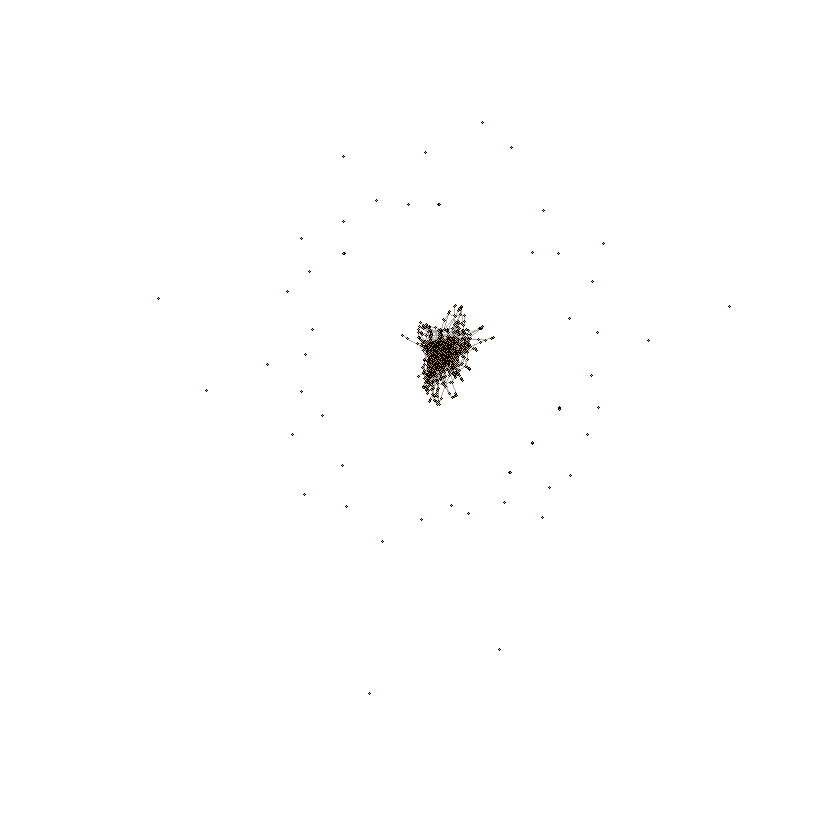

[1] "Mean:  3.122"
[1] "Variance:  3.30842442442442"
[1] "All realizations connected:  FALSE"
[1] "Probability to be connected:  0"
[1] "Diameter of GCC:  14"


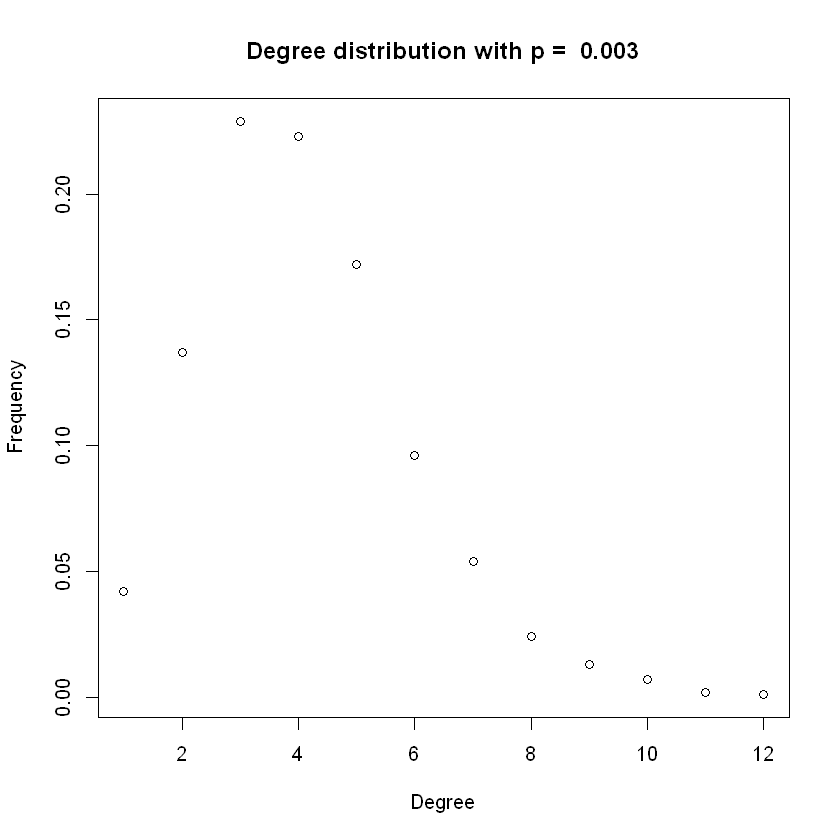

In [85]:
er_1ab(p=0.003)

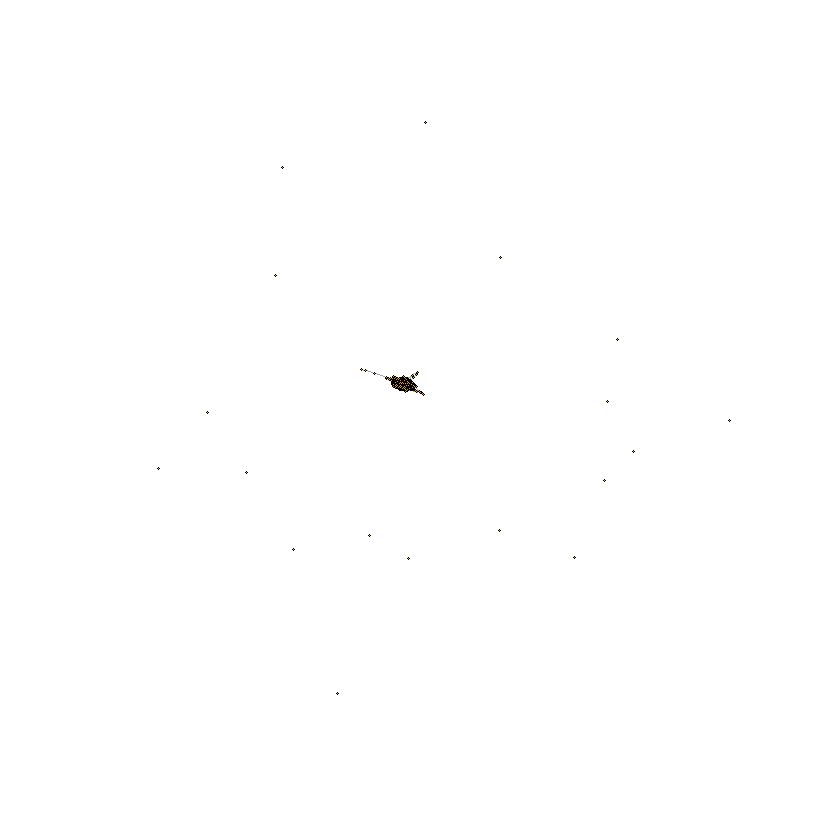

[1] "Mean:  4.034"
[1] "Variance:  3.91876276276276"
[1] "All realizations connected:  FALSE"
[1] "Probability to be connected:  0"
[1] "Diameter of GCC:  11"


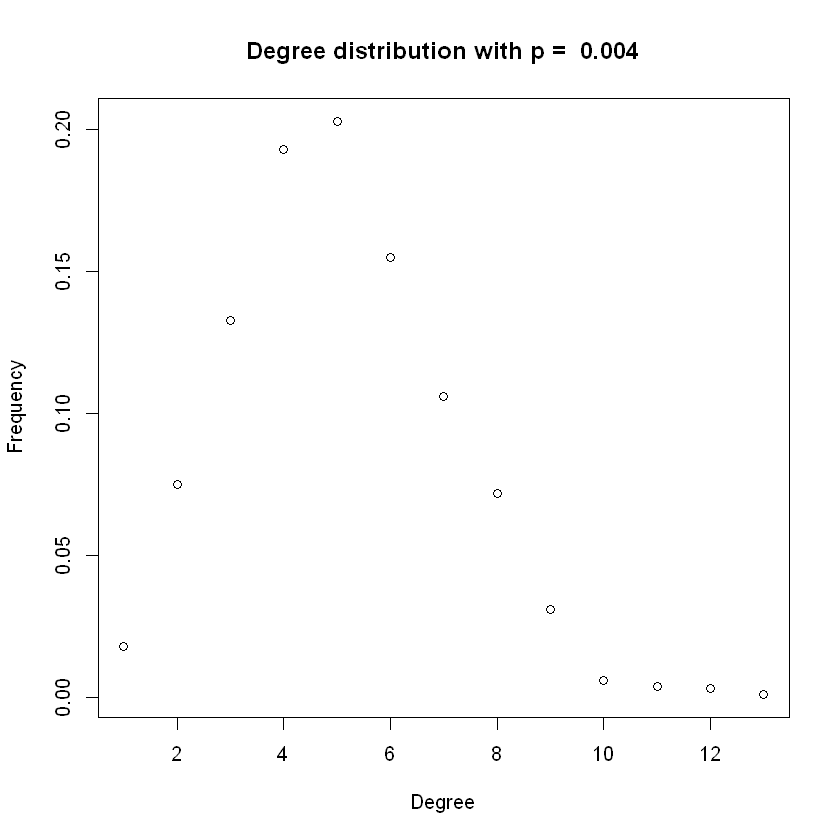

In [80]:
er_1ab(p=0.004)

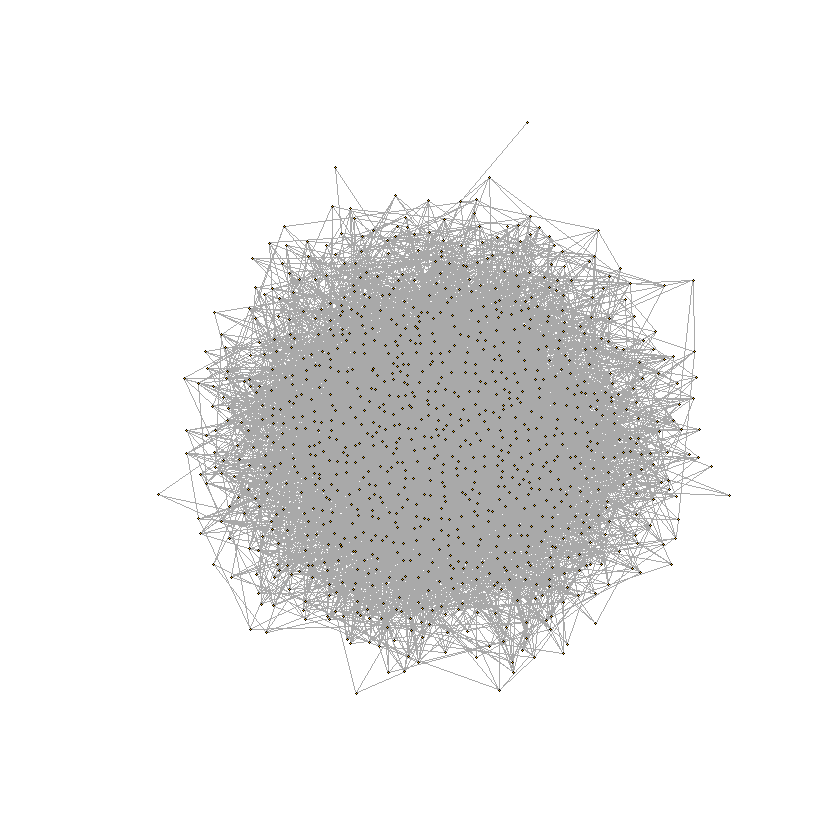

[1] "Mean:  10.03"
[1] "Variance:  9.80890890890891"
[1] "All realizations connected:  FALSE"
[1] "Probability to be connected:  0.99"
[1] "Diameter of GCC:  6"


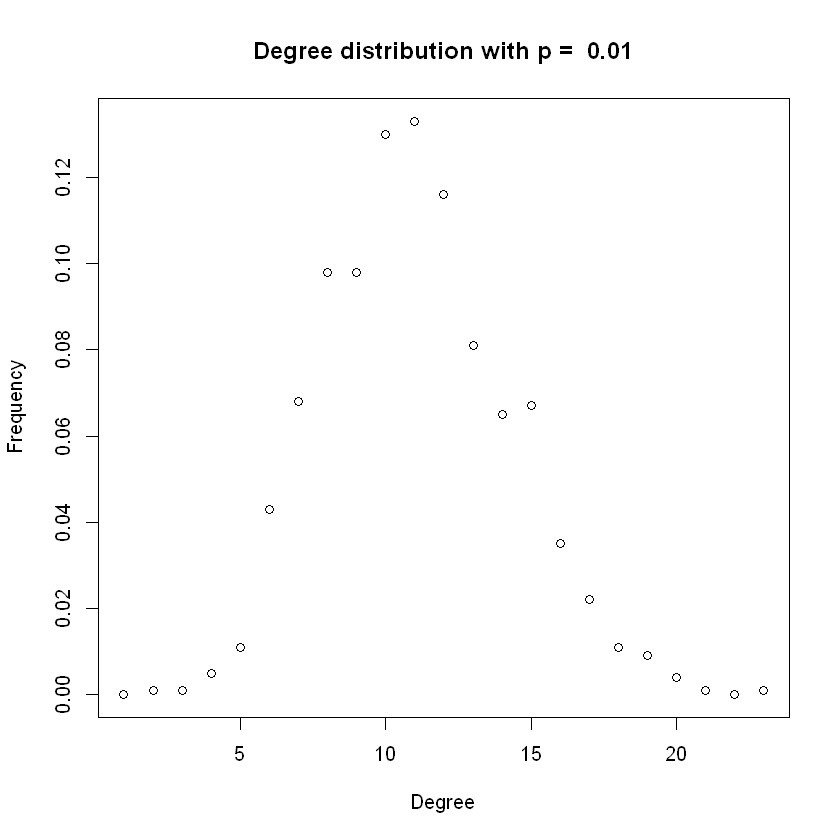

In [81]:
er_1ab(p=0.01)

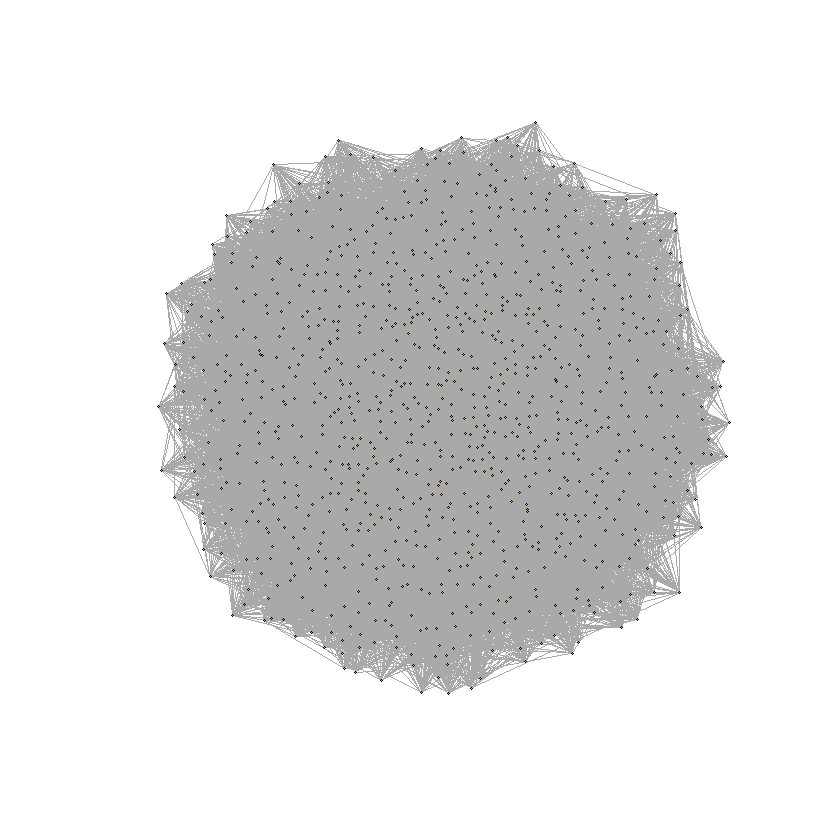

[1] "Mean:  50.012"
[1] "Variance:  48.4182742742743"
[1] "All realizations connected:  TRUE"
[1] "Probability to be connected:  1"


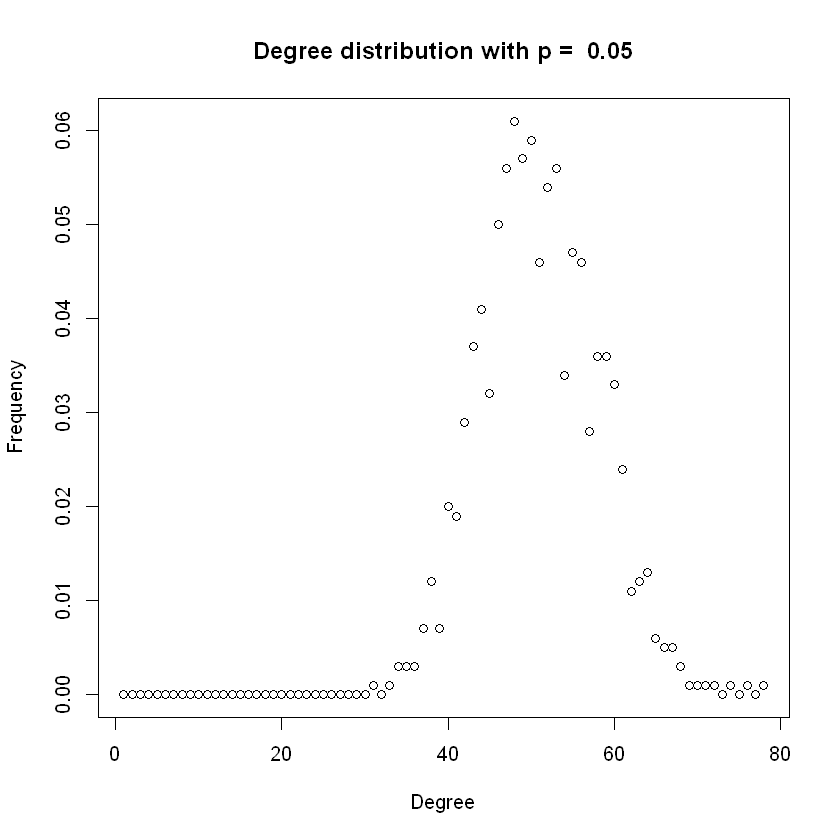

In [82]:
er_1ab(p=0.05)

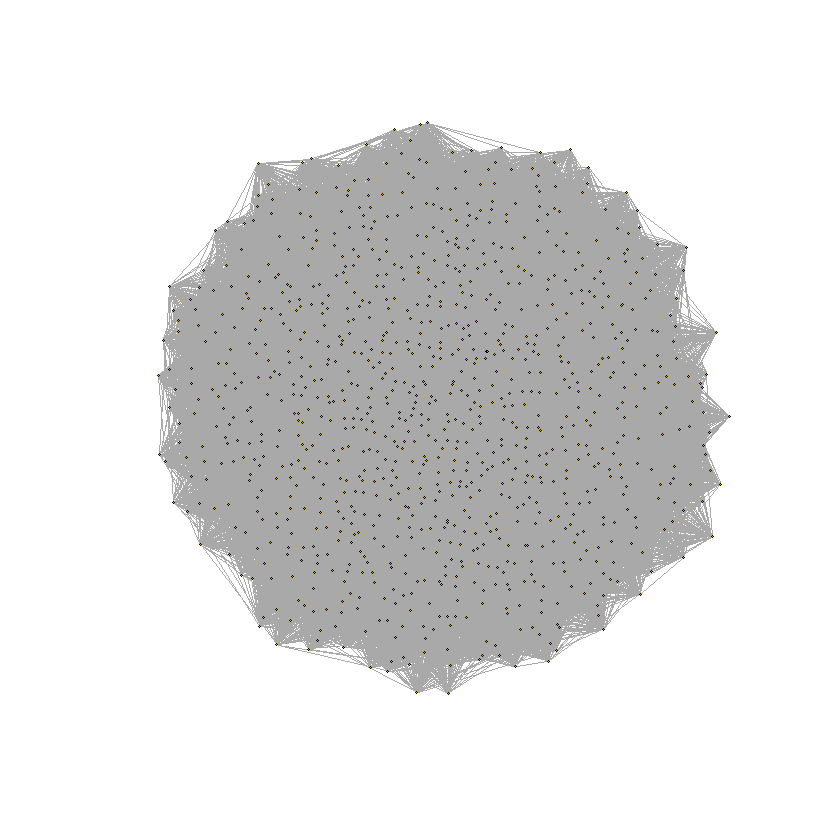

[1] "Mean:  100.184"
[1] "Variance:  91.3514954954955"
[1] "All realizations connected:  TRUE"
[1] "Probability to be connected:  1"


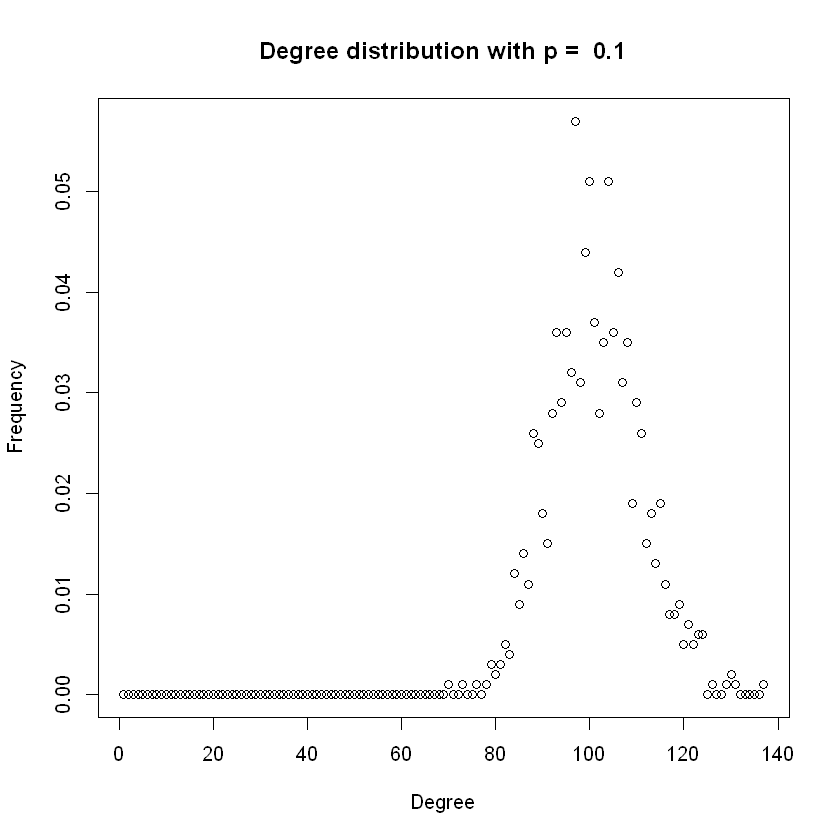

In [83]:
er_1ab(p=0.1)

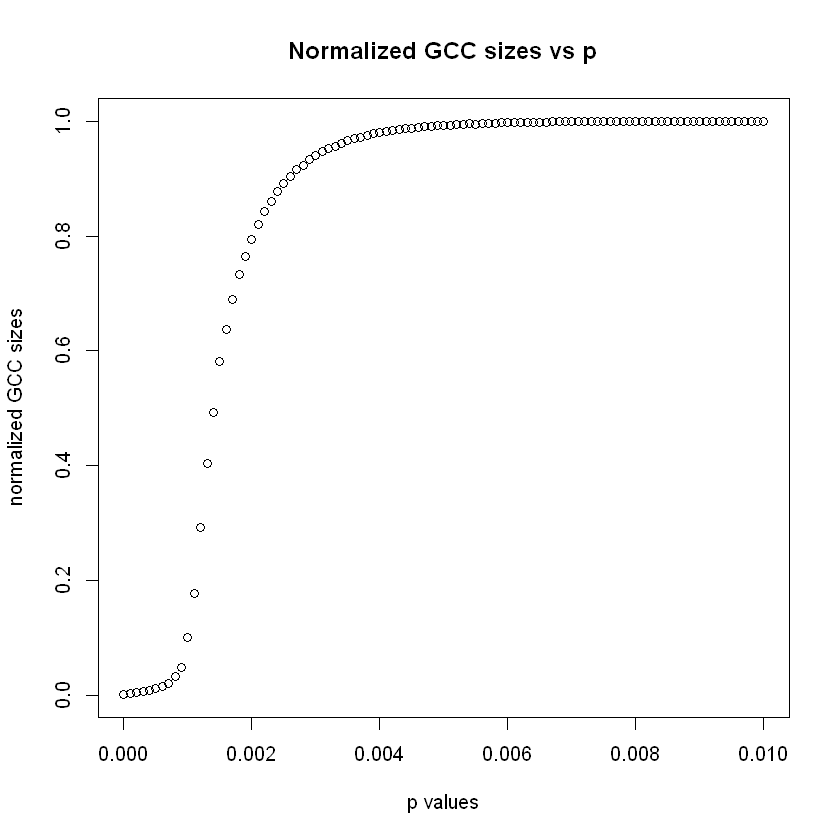

In [90]:
er_1c()